In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('dataset/mall_customers.csv', index_col= 0)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
data.drop('Genre', axis= 1, inplace= True)
data.drop('Age', axis= 1, inplace= True)
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [4]:
# shuffling data

data = data.sample(frac= 1)

In [5]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
k_means.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int32)

In [7]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

In [9]:
centers = k_means.cluster_centers_
centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

<function matplotlib.pyplot.show(*args, **kw)>

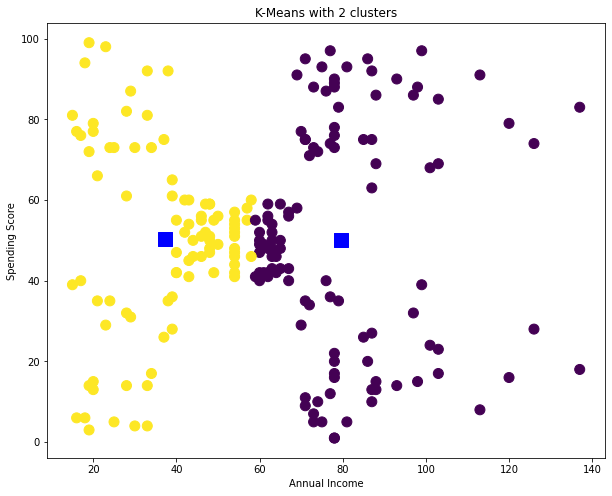

In [10]:
plt.figure(figsize=(10,8))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_,
           s = 100)
plt.scatter(centers[:,0], centers[:,1], color= 'blue', marker= 's', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')
plt.show

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, k_means.labels_)
print("score is ", score)

score is  0.29689691625030085


In [12]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data)

np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [13]:
centers = k_means.cluster_centers_
centers

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

<function matplotlib.pyplot.show(*args, **kw)>

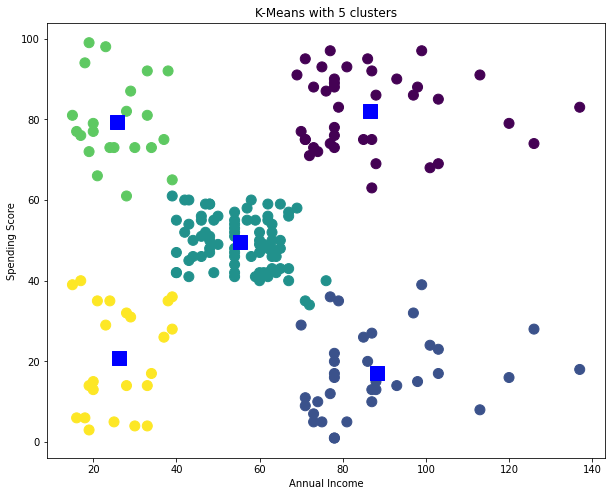

In [14]:
plt.figure(figsize=(10,8))

plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_,
           s = 100)
plt.scatter(centers[:,0], centers[:,1], color= 'blue', marker= 's', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')
plt.show

In [15]:
score = silhouette_score(data, k_means.labels_)
print("score is ", score)

score is  0.553931997444648
